#Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#DataSet

In [2]:
df = pd.read_csv('/content/drive/MyDrive/LinearRegression/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [5]:
df.shape

(10000, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [9]:
df.drop('Gender', axis=1, inplace=True)

In [10]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0.5, 1.0, 'Height V/s Weight')

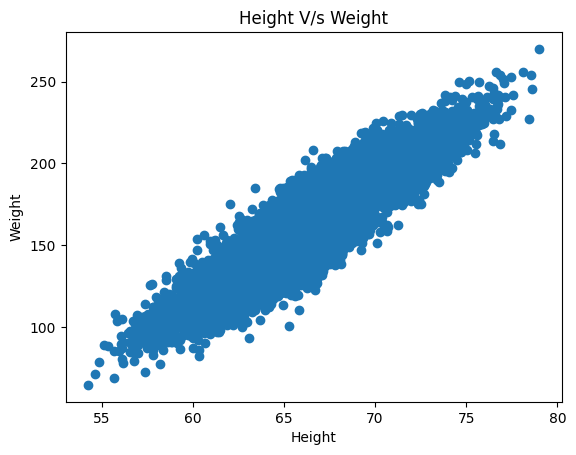

In [11]:
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height V/s Weight')

In [12]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


<Axes: >

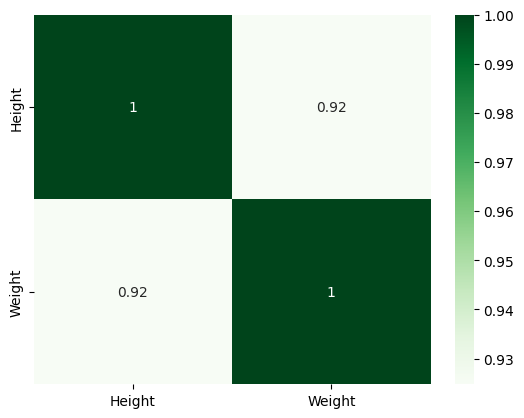

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [14]:
model = LinearRegression()

In [15]:
df.ndim

2

In [16]:
X = df.Height.values.reshape(-1,1)
y = df.Weight

In [17]:
X.ndim

2

In [18]:
df.Height.values.reshape(-1,1).ndim

2

In [19]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [20]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [22]:
len(X)

10000

In [23]:
len(X_train)

9000

In [24]:
len(X_test)

1000

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_test

8395    141.479939
5845    109.051629
8030    151.657329
6966     97.724602
5588    126.088338
           ...    
8159    160.100381
9496    117.659637
312     171.016941
6858    123.743339
3527    197.375666
Name: Weight, Length: 1000, dtype: float64

In [28]:
y_pred

array([142.99469506, 101.19671784, 144.98131344, 118.74259994,
       123.79634883, 119.59835825, 117.401643  , 139.42405932,
       145.97171192, 165.06184065, 217.37173139, 163.70946472,
       147.52863998, 148.3817933 , 157.08660165, 116.89068183,
       192.89387741, 133.21941046, 177.93945961, 194.46192011,
       163.87279229, 144.27975042, 146.98602323, 210.71613816,
       154.14746681, 157.01481352, 118.80019061, 173.39510495,
       183.04558133, 165.74369985, 196.13951859, 188.62683278,
       148.72805315, 158.48534013, 202.07100317, 170.88473542,
       155.94393273, 118.50058763, 179.36349273, 244.8802139 ,
       181.84233004, 188.00453789, 180.13153194, 171.88352144,
       153.81793375, 157.35393511, 124.45133376, 150.79014051,
       208.57093049, 198.52251952, 208.02005261, 171.10039855,
       162.23435324, 154.81010193, 181.98668299, 116.51188717,
       112.51004997, 160.17667059, 140.76646773, 156.00819141,
       158.64847923, 183.37724372, 168.78095451, 176.17

In [29]:
newdf = pd.DataFrame({"Value of X": X_test.flatten(),
                      "Actual Value": y_test,
                      "Predicted Value": y_pred})

In [30]:
X_test.flatten().ndim

1

In [31]:
newdf.head()

,Value of X,Actual Value,Predicted Value
8395,63.983494,141.479939,142.994695
5845,58.577576,109.051629,101.196718
8030,64.240432,151.657329,144.981313
6966,60.846863,97.724602,118.742600
5588,61.500487,126.088338,123.796349


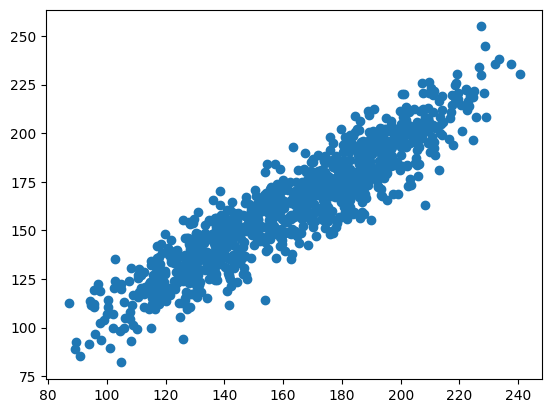

In [32]:
plt.scatter(newdf['Actual Value'], newdf['Predicted Value'])

In [33]:
newdf[['Actual Value', 'Predicted Value']].corr()

,Actual Value,Predicted Value
Actual Value,1.000000,0.922158
Predicted Value,0.922158,1.000000


In [34]:
model.coef_

array([7.73189237])

In [35]:
model.intercept_

-351.7187935770834

In [37]:
# y = mx + c
# y = 7.70698237*100 -350.01732093371584

In [38]:
r2_score(y_test, y_pred)

0.8500251223612107

In [ ]:
# 86% Accurate

In [39]:
y = 7.70698237*60 -350.01732093371584
y

112.40162126628417

In [40]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Importing the Libraries

Reading the dataset

EDA

Choosing a Model

Feature Engg.

Splitting the dataset

Fitting the model [Training]

Prediction [Testing]

Evaluation